In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
Exp = pd.read_csv('E://python//Exp_Salaries.csv')
Exp

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
0,32782,1,0,7,0,A,0
1,32920,3,15,9,1,A,4
2,29548,6,5,1,0,A,0
3,39828,6,18,5,1,A,5
4,31528,11,3,3,0,A,6
5,38985,7,18,9,0,A,5
6,41889,16,22,7,0,A,7
7,38791,4,21,5,0,A,9
8,28985,1,0,4,1,A,4
9,24749,2,6,0,1,A,1


In [2]:
Exp['Total_Exp'] = Exp['Years_Previous_Experience'] + Exp['Years_Employed']
X = pd.DataFrame(Exp['Total_Exp'])
X

,Total_Exp
0,1
1,18
2,11
3,24
4,14
5,25
6,38
7,25
8,1
9,8


In [3]:
y = pd.DataFrame(Exp['Salary'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[887.50584459]]
Intercept [26572.68445149]
R square 0.4781344378774528


In [4]:
import matplotlib.pyplot as plt

plt.scatter(Exp['Salary'],Exp['Years_Employed'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
test_data = [15,8,23,6,11]
df_test = pd.DataFrame(test_data, columns = ['Total_Exp'])
predict = lm.predict(df_test)
print(predict)


[[39885.2721203 ]
 [33672.73120819]
 [46985.318877  ]
 [31897.71951901]
 [36335.24874195]]


ERROR.csv

In [6]:
from sklearn.metrics import mean_squared_error

error = pd.read_csv('E://Python//Error2.csv')
error


,Y,Yb,Error,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,43670,39885,3785,NaN,NaN,NaN,NaN
1,24749,33672,-8923,NaN,NaN,NaN,NaN
2,46189,46985,-796,NaN,NaN,NaN,NaN
3,26578,31897,-5319,NaN,NaN,NaN,NaN
4,36487,36335,152,NaN,NaN,NaN,NaN


In [7]:
y_true = list(error['Y'])
y_exp  = list(error['Yb'])

In [8]:
print(y_true)
print(y_exp)

[43670, 24749, 46189, 26578, 36487]
[39885, 33672, 46985, 31897, 36335]


In [9]:
#R
import math
math.sqrt(mean_squared_error(y_true, y_exp))

4957.7138884772285

In [10]:
import numpy as np
y_true,y_exp = np.array(y_true),np.array(y_exp)
m = np.mean(np.abs((y_true - y_exp)/y_true))
print(m)

0.1337479851923614


In [11]:
m = np.mean(np.square((y_true - y_exp)/y_true))
a1 = np.sqrt(m)

In [12]:
a1

0.1886089431172216

In [13]:
#Simple Linear Regression for boston dataset

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_boston()
print(data.DESCR)
df = pd.DataFrame(data.data, columns = data.feature_names)
print(df.head())
target = pd.DataFrame(data.target,columns=['MEDV'])
print(target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
print(df.isnull().values.any())

False


In [15]:
X = pd.DataFrame(df['CRIM'])
y= pd.DataFrame(target['MEDV'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[-0.41519028]]
Intercept [24.03310617]
R square 0.15078046904975717


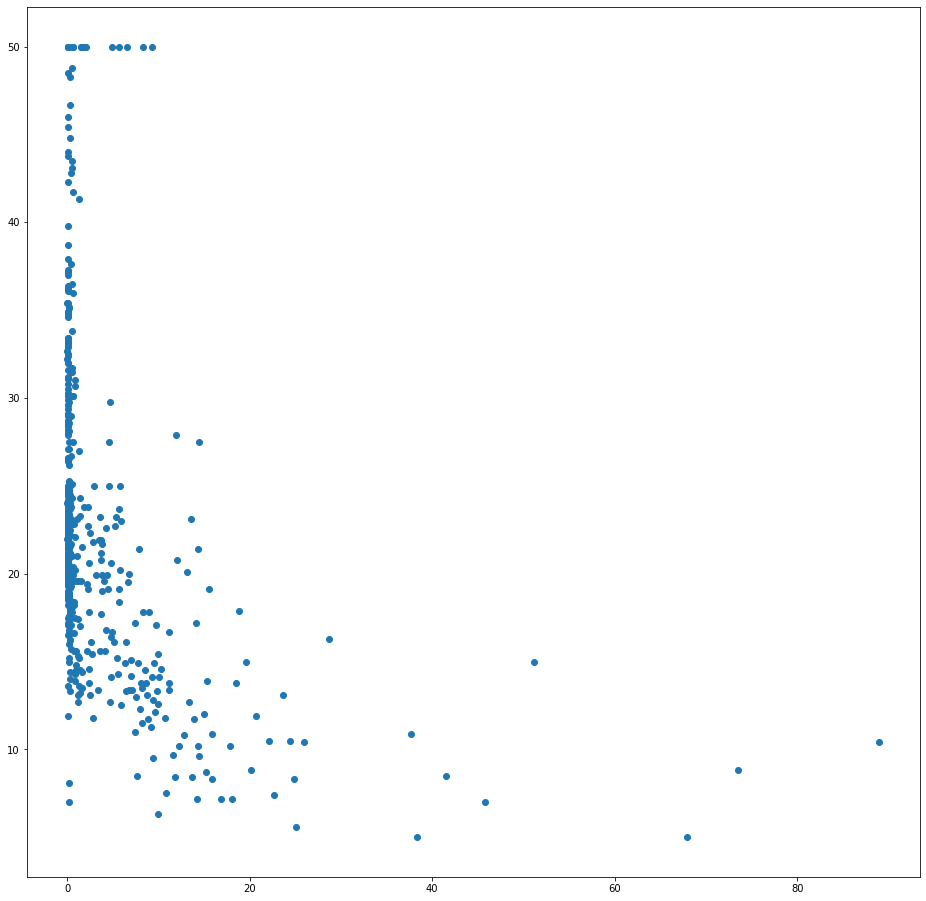

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))

plt.scatter(df['CRIM'],target['MEDV'])
plt.show()

In [17]:
X = df[['CRIM','RM']]
y= pd.DataFrame(target['MEDV'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[-0.26491325  8.39106825]]
Intercept [-29.24471945]
R square 0.5419591738494084


In [18]:
X = df[['CRIM','RM','PTRATIO']]
y= pd.DataFrame(target['MEDV'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [[-0.20496083  7.3804111  -1.0695461 ]]
Intercept [-3.37070434]
R square 0.5943412940723471


In [19]:
X = df[['CRIM','RM','PTRATIO','B']]
y= target['MEDV']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [-0.1398647   7.32206968 -1.02414916  0.01699394]
Intercept -10.138397357380573
R square 0.6184269510708369


In [20]:
X = df[['CRIM','RM','PTRATIO','LSTAT','DIS']]
y= target['MEDV']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [-0.09180815  4.33255798 -0.92137967 -0.62440124 -0.62010626]
Intercept 22.89448591522036
R square 0.6957749733021503


In [21]:
alpha = 22.89 -(0.09180815*0.00632) +  (4.33255798*6.575) - (0.92137967*15.3) - (0.62440124*4.98) - (0.62010626*4.09)

In [22]:
alpha

31.633126761391996

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y= target['MEDV']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X,y))

coeficent [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept 36.459488385089855
R square 0.7406426641094095


In [25]:
aa = list(lm.coef_)

In [26]:
aa

[-0.10801135783679539,
 0.04642045836687953,
 0.020558626367068917,
 2.6867338193448442,
 -17.766611228299986,
 3.8098652068092282,
 0.0006922246403431768,
 -1.47556684560025,
 0.30604947898516427,
 -0.012334593916574021,
 -0.9527472317072921,
 0.00931168327379375,
 -0.5247583778554881]

In [27]:
df['CRIM'][0]

0.00632

In [36]:
for i in range(0,506):
    df['Y_MEDV'][i]= pd.Series(36.459488385089855 -0.10801135783679539 * df['CRIM'][i] + 0.04642045836687953 * df['ZN'][i] + 0.020558626367068917 * df['INDUS'][i]+2.6867338193448442 * df['CHAS'][i] -17.766611228299986 * df['NOX'][i] + 3.8098652068092282 * df['RM'][i]+ 0.0006922246403431768 * df['AGE'][i] -1.47556684560025 * df['DIS'][i] + 0.30604947898516427 * df['RAD'][i]-0.012334593916574021 * df['TAX'][i]-0.9527472317072921 * df['PTRATIO'][i]+ 0.00931168327379375* df['B'][i]-0.5247583778554881 * df['LSTAT'][i])

In [37]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_MEDV,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,23.533341,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,22.375719,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,27.627426,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,26.127967,22.0


In [38]:
df['MEDV']= target['MEDV']

In [39]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_MEDV,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,23.533341,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,22.375719,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,27.627426,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,26.127967,22.0


In [40]:
df[0:25]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_MEDV,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,25.256284,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,23.001808,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,19.535988,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,11.523637,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.920262,18.9


In [41]:
df.to_csv('EQUATION.csv')
df2 = pd.read_csv('EQUATION.csv')

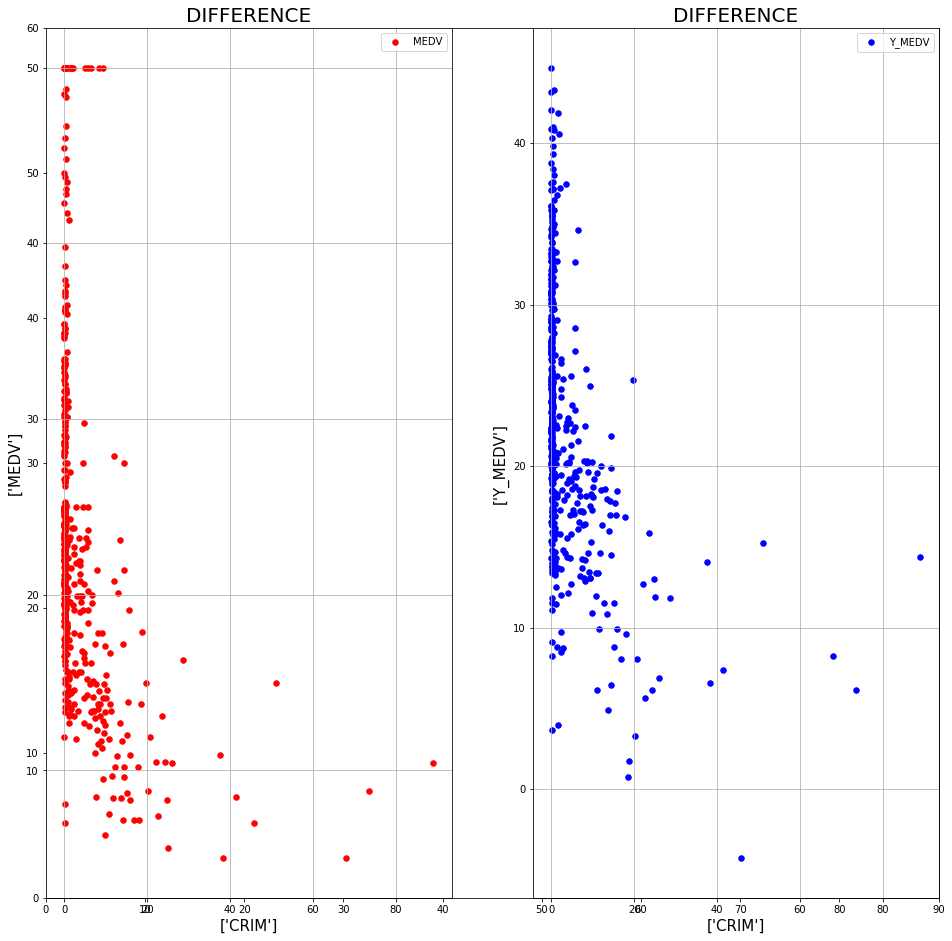

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))
plt.xlim(0,90)
plt.ylim(0,60)

ax = fig.add_subplot(1,2,1)
ax.set_xlabel(['CRIM'],fontsize = 15)
ax.set_ylabel(['MEDV'],fontsize = 15)
ax.set_title('DIFFERENCE',fontsize = 20)


ax.scatter(df2['CRIM'],df2['MEDV'], c= 'red',s = 30)
ax.legend(['MEDV'])
ax.grid()

bx = fig.add_subplot(1,2,2)
bx.set_xlabel(['CRIM'],fontsize = 15)
bx.set_ylabel(['Y_MEDV'],fontsize = 15)
bx.set_title('DIFFERENCE',fontsize = 20)


bx.scatter(df2['CRIM'],df2['Y_MEDV'], c= 'blue',s = 30)
bx.legend(['Y_MEDV'])
bx.grid()